## Data Pre Processing

In [46]:
import pandas as pd
import numpy as np
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

print(df_train.shape)

(712, 12)


In [47]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
Survived         0
dtype: int64

In [48]:
df_train_new=df_train.drop(columns=["Cabin","PassengerId","Name","Ticket"])
mean_ages = df_train_new['Age'].mean()
df_train_new['Age'].fillna(mean_ages,inplace=True)
df_train_new = df_train_new.dropna()

In [49]:
X_train = df_train_new.drop(columns=["Survived"])
y_train = df_train_new["Survived"]

X_test = df_test.drop(columns=["Survived"])
y_test = df_test["Survived"]

### Graphs

<function matplotlib.pyplot.show(close=None, block=None)>

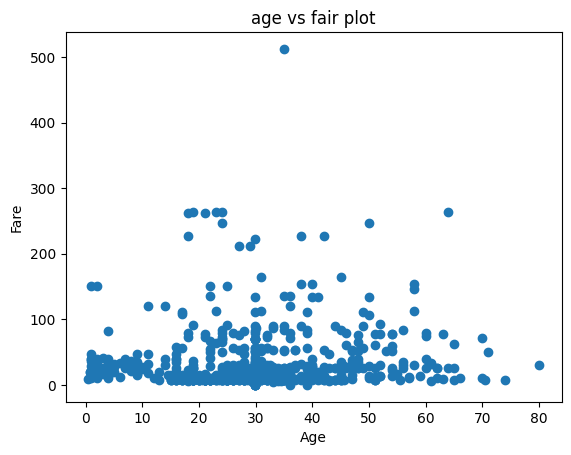

In [50]:
import matplotlib 
from matplotlib import pyplot as plt
plt.scatter(df_train_new["Age"], df_train_new["Fare"])
plt.title("age vs fair plot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show

In [51]:
print("max fare",df_train_new["Fare"].max())
print("min fare",df_train_new["Fare"].min())
print("max age",df_train_new["Age"].max())
print("mean fare ",df_train_new["Fare"].mean())
print("mean age",df_train_new["Age"].mean())

max fare 512.3292
min fare 0.0
max age 80.0
mean fare  32.52509295774648
mean age 29.75497865240222


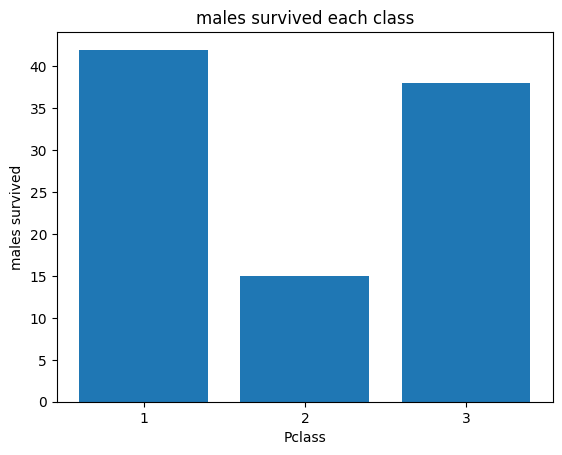

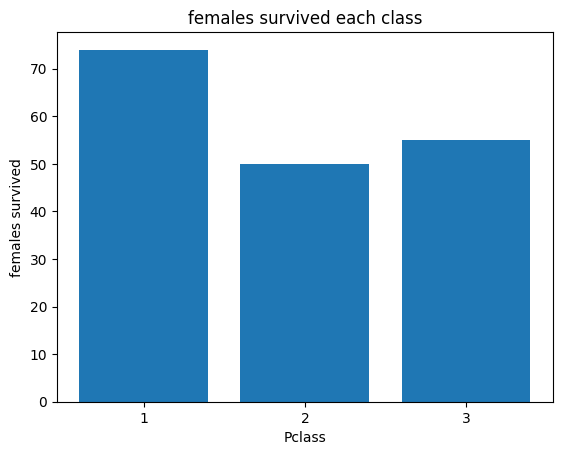

        Survived
Pclass          
1             42
2             15
3             38
        Survived
Pclass          
1             74
2             50
3             55
min males survived Survived    15
dtype: int64


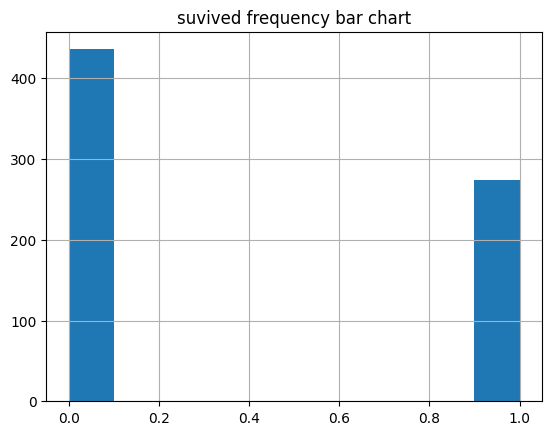

Text(0.5, 1.0, 'survived frequency each class')

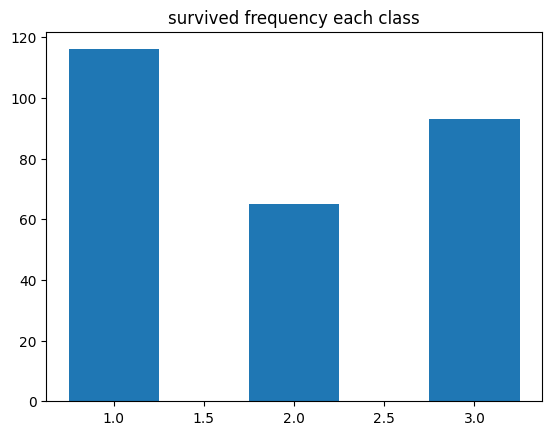

In [52]:
total_survivors = df_train_new[["Sex","Pclass","Survived"]]

males_survived= total_survivors[total_survivors.Sex == 'male'].groupby("Pclass").sum('Survived')
plt.bar(males_survived.index.values,males_survived["Survived"])
plt.title("males survived each class")
plt.xticks(males_survived.index.values)
plt.xlabel("Pclass")
plt.ylabel("males survived")
plt.show()

temp = df_train_new[["Sex","Pclass","Survived"]]
females_survived= total_survivors[total_survivors.Sex == 'female'].groupby("Pclass").sum('Survived')
plt.bar(females_survived.index.values,females_survived["Survived"])
plt.title("females survived each class")
plt.xticks(females_survived.index.values)
plt.xlabel("Pclass")
plt.ylabel("females survived")
plt.show()

print(males_survived)
print(females_survived)

print("min males survived",males_survived.min())

y_train.hist()
plt.title("suvived frequency bar chart")
plt.show()

cumulative_survivors=total_survivors.groupby("Pclass").sum('Survived')
plt.bar(cumulative_survivors.index.values,cumulative_survivors["Survived"],width=0.5)
plt.title("survived frequency each class")

In [53]:
print(X_train.shape)
X_train = pd.get_dummies(X_train,columns=["Sex","Embarked"],drop_first=True)
print(X_train.shape)

(710, 7)
(710, 8)


## Data Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model training

### Logistic Regression model_lr

In [55]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_lr = accuracy_score(y_test,y_pred_lr)
print(accuracyScore_lr)


0.888268156424581


### SVM model_svm

In [56]:
from sklearn.svm import SVC
model_svm= SVC(random_state=0).fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracyScore_svm = accuracy_score(y_test,y_pred_svm)
print(accuracyScore_svm)


0.8659217877094972


### Logistic Regression 20 noise 

In [57]:
df_train_noise20 = pd.read_csv("df_train_noise20.csv")

X_train_20 = df_train_noise20.drop(columns=["Survived"])
y_train_20 = df_train_noise20["Survived"]

from sklearn.linear_model import LogisticRegression
model_lr_noise20 = LogisticRegression(random_state=0).fit(X_train_20,y_train_20)
y_pred_lr_noise20=model_lr_noise20.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_lr_noise20 = accuracy_score(y_test,y_pred_lr_noise20)
print(accuracyScore_lr_noise20)

0.8435754189944135


C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Logistic Regression 40 noise 

In [58]:
df_train_noise40 = pd.read_csv("df_train_noise40.csv")
X_train_40 = df_train_noise40.drop(columns=["Survived"])
y_train_40 = df_train_noise40["Survived"]


from sklearn.linear_model import LogisticRegression
model_lr_noise40 = LogisticRegression(random_state=0).fit(X_train_40,y_train_40)
y_pred_lr_noise40=model_lr_noise40.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_lr_noise40 = accuracy_score(y_test,y_pred_lr_noise40)
print(accuracyScore_lr_noise40)

0.7653631284916201


C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Logistic Regression 60 noise 

In [59]:
df_train_noise60 = pd.read_csv("df_train_noise60.csv")

X_train_60 = df_train_noise60.drop(columns=["Survived"])
y_train_60 = df_train_noise60["Survived"]


from sklearn.linear_model import LogisticRegression
model_lr_noise60 = LogisticRegression(random_state=0).fit(X_train_60,y_train_60)
y_pred_lr_noise60=model_lr_noise60.predict(X_test)
from sklearn.metrics import accuracy_score
accuracyScore_lr_noise60 = accuracy_score(y_test,y_pred_lr_noise60)
print(accuracyScore_lr_noise60)

0.6089385474860335


C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### SVM 20 noise 

In [60]:
from sklearn.svm import SVC
model_svm_noise_20= SVC(random_state=0).fit(X_train_20, y_train_20)
y_pred_svm_noise20 = model_svm_noise_20.predict(X_test)
accuracyScore_svm_noise20 = accuracy_score(y_test,y_pred_svm_noise20)
print(accuracyScore_svm_noise20)

0.8324022346368715


C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### SVM 40 noise 

In [61]:
model_svm_noise_40= SVC(random_state=0).fit(X_train_40, y_train_40)
y_pred_svm_noise40 = model_svm_noise_40.predict(X_test)
accuracyScore_svm_noise40 = accuracy_score(y_test,y_pred_svm_noise40)
print(accuracyScore_svm_noise40)

0.8547486033519553


C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


### SVM 60 noise 

In [62]:
model_svm_noise_60= SVC(random_state=0).fit(X_train_60, y_train_60)
y_pred_svm_noise60 = model_svm_noise_60.predict(X_test)
accuracyScore_svm_noise60 = accuracy_score(y_test,y_pred_svm_noise60)
print(accuracyScore_svm_noise60)

C:\Users\sanje\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.6312849162011173


## Classification report 

### logistic regression report

In [63]:
from sklearn.metrics import classification_report
model_lr_classification_report = classification_report(y_test, y_pred_lr,output_dict=True)
print("report for LR class 0 :",model_lr_classification_report["0"])
print("report for LR class 1 :",model_lr_classification_report["1"])
from sklearn.metrics import confusion_matrix
print("confusion matrix for LR is ",confusion_matrix(y_test, y_pred_lr))


report for LR class 0 : {'precision': 0.8974358974358975, 'recall': 0.9292035398230089, 'f1-score': 0.9130434782608695, 'support': 113}
report for LR class 1 : {'precision': 0.8709677419354839, 'recall': 0.8181818181818182, 'f1-score': 0.84375, 'support': 66}
confusion matrix for LR is  [[105   8]
 [ 12  54]]


### SVM report

In [64]:

model_svm_classification_report = classification_report(y_test, y_pred_svm,output_dict=True)
print("report for SVM class 0 :",model_svm_classification_report["0"])
print("report for SVM class 1 :",model_svm_classification_report["1"])
print("confusion matrix for SVM is ",confusion_matrix(y_test, y_pred_svm))


report for SVM class 0 : {'precision': 0.8345864661654135, 'recall': 0.9823008849557522, 'f1-score': 0.9024390243902438, 'support': 113}
report for SVM class 1 : {'precision': 0.9565217391304348, 'recall': 0.6666666666666666, 'f1-score': 0.7857142857142856, 'support': 66}
confusion matrix for SVM is  [[111   2]
 [ 22  44]]


### LR noise 20,40,60 report

In [65]:
model_lr__noise_20_classification_report = classification_report(y_test, y_pred_lr_noise20,output_dict=True)
print("report for LR_noise_20 class 0 :",model_lr__noise_20_classification_report["0"])
print("report for LR_noise_20 class 1 :",model_lr__noise_20_classification_report["1"])
print("confusion matrix for LR_noise_20 is ",confusion_matrix(y_test, y_pred_lr_noise20))

model_lr__noise_40_classification_report = classification_report(y_test, y_pred_lr_noise40,output_dict=True)
print("report for LR_noise_40 class 0 :",model_lr__noise_40_classification_report["0"])
print("report for LR_noise_40 class 1 :",model_lr__noise_40_classification_report["1"])
print("confusion matrix for LR_noise_40 is ",confusion_matrix(y_test, y_pred_lr_noise40))

model_lr__noise_60_classification_report = classification_report(y_test, y_pred_lr_noise60,output_dict=True)
print("report for LR_noise_60 class 0 :",model_lr__noise_60_classification_report["0"])
print("report for LR_noise_60 class 1 :",model_lr__noise_60_classification_report["1"])
print("confusion matrix for LR_noise_60 is ",confusion_matrix(y_test, y_pred_lr_noise60))


report for LR_noise_20 class 0 : {'precision': 0.8455284552845529, 'recall': 0.9203539823008849, 'f1-score': 0.8813559322033898, 'support': 113}
report for LR_noise_20 class 1 : {'precision': 0.8392857142857143, 'recall': 0.7121212121212122, 'f1-score': 0.7704918032786886, 'support': 66}
confusion matrix for LR_noise_20 is  [[104   9]
 [ 19  47]]
report for LR_noise_40 class 0 : {'precision': 0.738255033557047, 'recall': 0.9734513274336283, 'f1-score': 0.8396946564885496, 'support': 113}
report for LR_noise_40 class 1 : {'precision': 0.9, 'recall': 0.4090909090909091, 'f1-score': 0.5625000000000001, 'support': 66}
confusion matrix for LR_noise_40 is  [[110   3]
 [ 39  27]]
report for LR_noise_60 class 0 : {'precision': 0.6776859504132231, 'recall': 0.7256637168141593, 'f1-score': 0.7008547008547009, 'support': 113}
report for LR_noise_60 class 1 : {'precision': 0.46551724137931033, 'recall': 0.4090909090909091, 'f1-score': 0.43548387096774194, 'support': 66}
confusion matrix for LR_noi

### SVM noise 20,40,60 report

In [66]:

model_lr_svm_noise_20_classification_report = classification_report(y_test, y_pred_svm_noise20,output_dict=True)
print("report for SVM_noise_20 class 0 :",model_lr_svm_noise_20_classification_report["0"])
print("report for SVM_noise_20 class 1 :",model_lr_svm_noise_20_classification_report["1"])
print("confusion matrix for SVM_noise_20 is ",confusion_matrix(y_test, y_pred_svm_noise20))


model_lr_svm_noise_40_classification_report = classification_report(y_test, y_pred_svm_noise40,output_dict=True)
print("report for SVM_noise_40 class 0 :",model_lr_svm_noise_40_classification_report["0"])
print("report for SVM_noise_40 class 1 :",model_lr_svm_noise_40_classification_report["1"])
print("confusion matrix for SVM_noise_40 is ",confusion_matrix(y_test, y_pred_svm_noise40))


model_lr_svm_noise_60_classification_report = classification_report(y_test, y_pred_svm_noise60,output_dict=True)
print("report for SVM_noise_60 class 0 :",model_lr_svm_noise_60_classification_report["0"])
print("report for SVM_noise_60 class 1 :",model_lr_svm_noise_60_classification_report["1"])
print("confusion matrix for SVM_noise_60 is ",confusion_matrix(y_test, y_pred_svm_noise60))


report for SVM_noise_20 class 0 : {'precision': 0.7902097902097902, 'recall': 1.0, 'f1-score': 0.8828125, 'support': 113}
report for SVM_noise_20 class 1 : {'precision': 1.0, 'recall': 0.5454545454545454, 'f1-score': 0.7058823529411764, 'support': 66}
confusion matrix for SVM_noise_20 is  [[113   0]
 [ 30  36]]
report for SVM_noise_40 class 0 : {'precision': 0.8222222222222222, 'recall': 0.9823008849557522, 'f1-score': 0.8951612903225806, 'support': 113}
report for SVM_noise_40 class 1 : {'precision': 0.9545454545454546, 'recall': 0.6363636363636364, 'f1-score': 0.7636363636363637, 'support': 66}
confusion matrix for SVM_noise_40 is  [[111   2]
 [ 24  42]]
report for SVM_noise_60 class 0 : {'precision': 0.6715328467153284, 'recall': 0.8141592920353983, 'f1-score': 0.736, 'support': 113}
report for SVM_noise_60 class 1 : {'precision': 0.5, 'recall': 0.3181818181818182, 'f1-score': 0.3888888888888889, 'support': 66}
confusion matrix for SVM_noise_60 is  [[92 21]
 [45 21]]
